<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Hexbin_plots_with_Mapbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 13.9 MB/s 
     |████████████████████████████████| 6.3 MB 43.4 MB/s 
     |████████████████████████████████| 16.7 MB 63.7 MB/s 


We will use a geojson file that stores geometries as hexagons. You can find the files here: https://team.carto.com/u/andrew/tables/andrew.us_states_hexgrid/public/map 

In [26]:
# Import geopandas library
import geopandas as gpd

# Load file - we are reading the file from a URL - you can also load your own geopandas shapefile here
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)
geoData.head()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry
0,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408..."
1,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544..."
2,1218,2015-05-13T22:25:00+00:00,2015-10-05T16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570..."
3,231,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5..."
4,244,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.53010, -88.96298 38.307..."


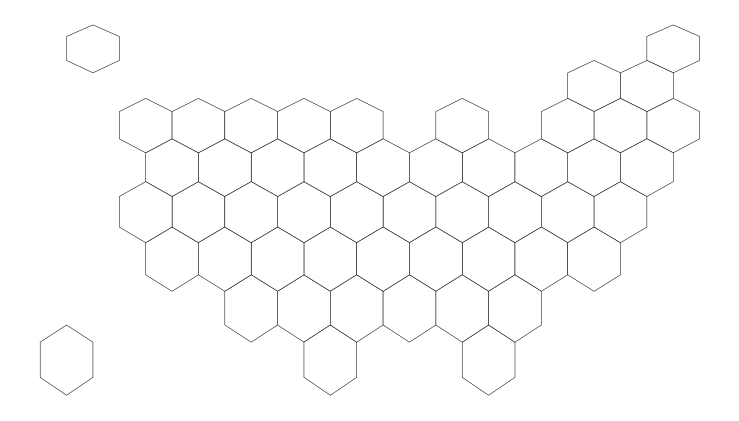

In [27]:
# Import the geoplot library.
import matplotlib.pyplot as plt

# Set the plot size for this notebook:
plt.rcParams["figure.figsize"]=13,13

# Draw a map with matplotlib
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');

In [28]:
# add a "centroid" column with the centroid position of each county
#lambda function applies the centroid operation on each row of the dataframe's geometry

geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid) 

geoData.head()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid
0,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408...",POINT (-72.62574 53.45575)
1,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.46420)
2,1218,2015-05-13T22:25:00+00:00,2015-10-05T16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498)
3,231,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126)
4,244,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.53010, -88.96298 38.307...",POINT (-91.68585 37.03536)


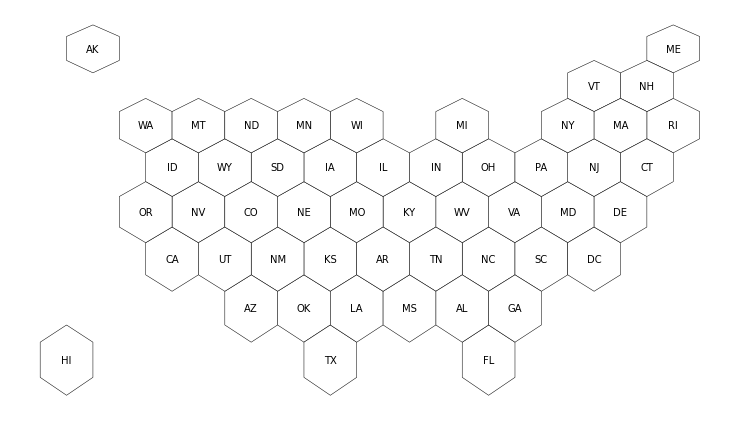

In [29]:
# redraw the empty hexbin map:
geoData.plot(color="white", edgecolor='black', linewidth=.5);
plt.axis('off');
# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    plt.annotate(s=row['iso3166_2'], xy=row['centroid'].coords[0], horizontalalignment='center', va='center')

In [30]:
# Read the mariage data stored on github:
import pandas as pd
marriageData = pd.read_csv("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/State_mariage_rate.csv")

marriageData.head()

,state,y_2015,y_2014,y_2013,y_2012,y_2011,y_2010,y_2009,y_2008,y_2007,y_2006,y_2005,y_2004,y_2003,y_2002,y_2001,y_2000,y_1999,y_1995,y_1990
0,Alabama,7.351544,7.806776004,7.817785135,8.2,8.4,8.2,8.3,8.6,8.9,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
1,Alaska,7.407588,7.50883632,7.293928165,7.2,7.8,8.0,7.8,8.4,8.5,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
2,Arizona,5.922469,5.780449006,5.401091114,5.6,5.7,5.9,5.6,6.0,6.4,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
3,Arkansas,10.040279,10.11202585,9.751051996,10.9,10.4,10.8,10.7,10.6,12.0,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
4,California,6.184957,6.441492172,6.460467341,6.0,5.8,5.8,5.8,6.7,6.2,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9


In [31]:
# Add a new column to the geo dataframe that will be used for joining:
geoData['state'] = geoData['google_name'].str.replace(' \(United States\)','')

geoData.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,state
0,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408...",POINT (-72.62574 53.45575),Maine
1,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.46420),Rhode Island
2,1218,2015-05-13T22:25:00+00:00,2015-10-05T16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498),Vermont
3,231,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126),Oklahoma
4,244,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.53010, -88.96298 38.307...",POINT (-91.68585 37.03536),North Carolina


In [32]:
# Merge the mariage dataset with the geospatial information
geoData = geoData.merge(mariageData, on = 'state')
geoData.head()

,cartodb_id,created_at,updated_at,label,bees,iso3166_2,google_name,geometry,centroid,state,...,y_2006,y_2005,y_2004,y_2003,y_2002,y_2001,y_2000,y_1999,y_1995,y_1990
0,1219,2015-05-13T22:26:15+00:00,2015-10-05T16:00:16+00:00,Maine,60.5,ME,Maine (United States),"POLYGON ((-72.62574 55.31320, -69.90286 54.408...",POINT (-72.62574 53.45575),Maine,...,7.8,8.2,8.6,8.4,8.4,8.6,8.8,8.6,8.7,9.7
1,1217,2015-05-13T22:24:35+00:00,2015-10-05T16:00:16+00:00,R.I.,47.8,RI,Rhode Island (United States),"POLYGON ((-72.62574 49.57439, -69.90286 48.544...",POINT (-72.62574 47.46420),Rhode Island,...,6.6,7.0,7.7,7.8,7.8,8.1,7.6,7.5,7.3,8.1
2,1218,2015-05-13T22:25:00+00:00,2015-10-05T16:00:16+00:00,Vt.,33.9,VT,Vermont (United States),"POLYGON ((-80.79436 52.53744, -78.07148 51.570...",POINT (-80.79436 50.55498),Vermont,...,8.6,8.9,9.4,9.7,9.8,9.8,10,10.0,10.3,10.9
3,231,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,Okla.,63.4,OK,Oklahoma (United States),"POLYGON ((-110.74597 35.79821, -108.02309 34.5...",POINT (-110.74597 33.18126),Oklahoma,...,7.3,7.3,6.5,---,---,---,---,6.8,8.6,10.6
4,244,2015-05-13T22:02:22+00:00,2015-10-05T16:00:16+00:00,N.C.,41.5,NC,North Carolina (United States),"POLYGON ((-91.68585 39.53010, -88.96298 38.307...",POINT (-91.68585 37.03536),North Carolina,...,7.3,7.3,7.3,7.4,7.7,7.4,8.2,8.5,8.4,7.8


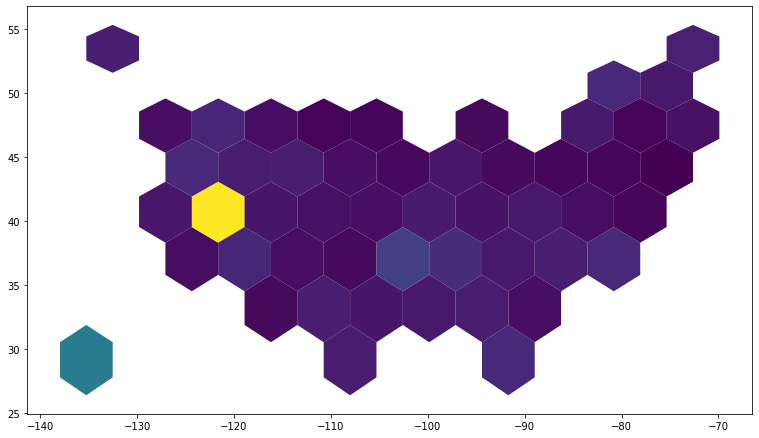

In [33]:
geoData.plot(column="y_2015", cmap="viridis");

Text(600, 0, 'Hexbin plot with geopandas')

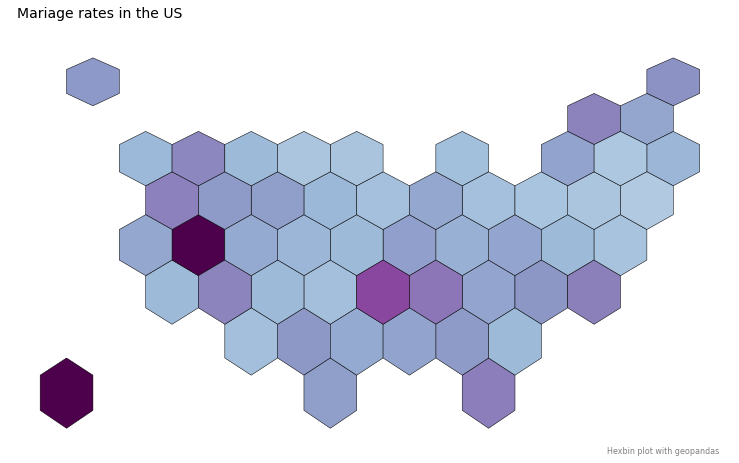

In [37]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
geoData.plot(
    ax=ax,
    column="y_2015", 
    cmap="BuPu", 
    norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='black', 
    linewidth=.5
);

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Mariage rates in the US', xy=(10,440),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('Hexbin plot with geopandas', xy=(600,0),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#808080')


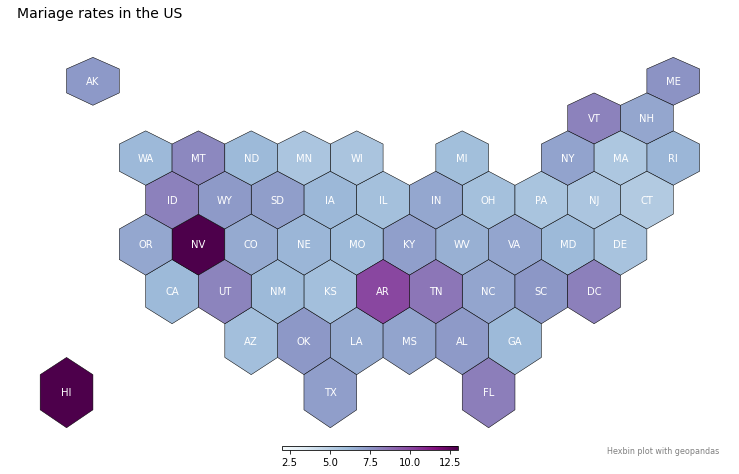

In [38]:
# Initialize the figure
fig, ax = plt.subplots(1, figsize=(13, 13))

# map counties with the right color:
geoData.plot(
    ax=ax,
    column="y_2015", 
    cmap="BuPu", 
    norm=plt.Normalize(vmin=2, vmax=13),
    edgecolor='black', 
    linewidth=.5
);

# Remove useless axis
ax.axis('off');

# Add title, subtitle and author
ax.annotate('Mariage rates in the US', xy=(10,440),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('Hexbin plot with geopandas', xy=(600,0),  xycoords='axes pixels', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#808080')


# for each county, annotate with the county name located at the centroid coordinates 
for idx, row in geoData.iterrows():
    ax.annotate(
        s=row['iso3166_2'], 
        xy=row['centroid'].coords[0], 
        horizontalalignment='center', 
        va='center',
        color="white"
    )

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=2, vmax=13))
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0 );